<a href="https://colab.research.google.com/github/Usuarioah03/Telecom-X-Parte-2/blob/main/Copia_de_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TelecomX_LATAM_2

#🛠️ Preparación de los Datos

Extracción del Archivo Tratado

Descripción

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [132]:
import pandas as pd

In [133]:
datos = pd.read_csv('df_telecom.csv')
datos.head()

,ID_Cliente,Evasion,Costo_Diario,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0.0,2.186667,Female,0.0,Yes,Yes,9.0,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,1.996667,Male,0.0,No,No,9.0,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,2.463333,Male,0.0,No,No,4.0,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,3.266667,Male,1.0,Yes,No,13.0,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,2.796667,Female,1.0,Yes,No,3.0,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Eliminación de Columnas Irrelevantes

Descripción

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [134]:
#eliminar filas con valores nulos
df = datos.dropna()

In [135]:
#Visualizar el DataFrame
df

,ID_Cliente,Evasion,Costo_Diario,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0.0,2.186667,Female,0.0,Yes,Yes,9.0,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0.0,1.996667,Male,0.0,No,No,9.0,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1.0,2.463333,Male,0.0,No,No,4.0,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1.0,3.266667,Male,1.0,Yes,No,13.0,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1.0,2.796667,Female,1.0,Yes,No,3.0,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,9695-IDRZR,0.0,3.871667,Female,0.0,No,No,13.0,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
6826,9696-RMYBA,0.0,2.670000,Male,0.0,Yes,No,22.0,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
6827,9699-UBQFS,0.0,3.150000,Male,0.0,No,No,2.0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
6828,9700-ISPUP,0.0,2.183333,Male,0.0,Yes,Yes,67.0,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [136]:
#Eliminar columnas irrelevantes: id_cliente, cargo_diario, meses_contrato
df = df.drop(columns=['ID_Cliente', 'Costo_Diario', 'tenure'], axis=1)
df.head(3)

,Evasion,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0.0,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0.0,Male,0.0,No,No,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,1.0,Male,0.0,No,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


##Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:
Artículo en Alura sobre codificación categórica

In [161]:
#Columnas categoricas
columnas_categoricas = df.select_dtypes(include=['object']).columns

In [160]:
#Aislando la Variable Churn
X = df.drop('Evasion', axis=1)
y = df['Evasion']


In [162]:
#Importar Make_column_transformer y One Hot Encoder
#Definir y asignar una variable para las columnas de la variable X
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

columnas_datos = X.columns
columnas_datos

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total'], dtype='object')

In [163]:
#Convertir las variables en formatos numericos con onehotencodery makecolumntransfirer
one_hot = make_column_transformer(
    (OneHotEncoder(drop='first'), columnas_categoricas),
    remainder='passthrough', sparse_threshold=0
)

In [164]:
#Usando fit transformamos y concatenamos los datos en
X = one_hot.fit_transform(X)

In [165]:
#Unir tanto X como y en un nuevo DataFrame para analisis
#Se usa principalmente para visualizar los datos en graficos
X_df = pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas_datos))
datos_codificados = pd.concat([X_df, y], axis=1)

In [166]:
#Ver como quedaron los nombres de las features
one_hot.get_feature_names_out(columnas_datos)

array(['onehotencoder__gender_Male', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_Yes',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_No internet service',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__PaymentMethod_Credit card (

In [144]:
#Visualización de los Datos en un DataFrame para un mejor analisis
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas_datos))

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,65.60,593.30
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,73.90,280.85
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,55.15,742.90
6826,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,85.10,1873.70
6827,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,50.30,92.75
6828,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,67.85,4627.65


In [145]:
#Convertir los datos para asegurar que sean utiles para modelos de
#Machine Learning
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

###1 Verificación de la Proporción de Cancelación (Evasion)

In [146]:
#Visualizar en porcentaje la Proporción de Cancelación
df['Evasion'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

,proportion
Evasion,
0.0,73.34%
1.0,26.66%


## Balanceo de Datos

In [147]:
#Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [148]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X, y)

In [149]:
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X)
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.471144,0.068315
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.062454
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.553731,0.032338
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.793532,0.142531
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.653234,0.030789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.367164,0.085540
6826,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.665174,0.215745
6827,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.318905,0.010680
6828,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.493532,0.532845


In [150]:
#Estandarización de los datos
from sklearn.preprocessing import StandardScaler

estandarizacion = StandardScaler()
X_train_estandarizado = estandarizacion.fit_transform(X)
pd.DataFrame(X_train_estandarizado)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-1.006463,1.032747,1.523806,-0.887406,-0.526188,-0.526188,-0.633039,-0.526188,1.373582,-0.526188,-0.724966,-0.526188,1.565086,-0.526188,1.263318,-0.526188,-0.796714,1.944111,-0.564387,0.828253,-0.521649,-0.713016,1.834941,-0.439570,0.025463,-0.746911
1,0.993578,-0.968292,-0.656252,-0.887406,-0.526188,-0.526188,-0.633039,-0.526188,-0.728023,-0.526188,-0.724966,-0.526188,-0.638942,-0.526188,-0.791567,-0.526188,1.255155,-0.514374,-0.564387,-1.207360,-0.521649,-0.713016,1.834941,-0.439570,-0.163860,-0.769344
2,0.993578,-0.968292,-0.656252,1.126879,-0.526188,-0.526188,-0.633039,-0.526188,-0.728023,-0.526188,1.379376,-0.526188,-0.638942,-0.526188,-0.791567,-0.526188,-0.796714,-0.514374,-0.564387,0.828253,-0.521649,1.402493,-0.544977,-0.439570,0.301143,-0.884618
3,0.993578,1.032747,-0.656252,1.126879,-0.526188,-0.526188,-0.633039,-0.526188,1.373582,-0.526188,1.379376,-0.526188,-0.638942,-0.526188,1.263318,-0.526188,1.255155,-0.514374,-0.564387,0.828253,-0.521649,1.402493,-0.544977,2.274952,1.101613,-0.462836
4,-1.006463,1.032747,-0.656252,1.126879,-0.526188,-0.526188,-0.633039,-0.526188,-0.728023,-0.526188,-0.724966,-0.526188,1.565086,-0.526188,1.263318,-0.526188,-0.796714,-0.514374,-0.564387,0.828253,-0.521649,-0.713016,1.834941,2.274952,0.633288,-0.890546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,-1.006463,-0.968292,-0.656252,-0.887406,-0.526188,-0.526188,1.579682,-0.526188,-0.728023,-0.526188,-0.724966,-0.526188,1.565086,-0.526188,-0.791567,-0.526188,-0.796714,1.944111,-0.564387,-1.207360,-0.521649,-0.713016,1.834941,-0.439570,-0.321629,-0.680977
6826,0.993578,1.032747,-0.656252,1.126879,-0.526188,-0.526188,-0.633039,-0.526188,-0.728023,-0.526188,-0.724966,-0.526188,-0.638942,-0.526188,-0.791567,-0.526188,1.255155,-0.514374,-0.564387,0.828253,-0.521649,1.402493,-0.544977,-0.439570,0.673146,-0.182596
6827,0.993578,-0.968292,-0.656252,-0.887406,-0.526188,-0.526188,-0.633039,-0.526188,1.373582,-0.526188,-0.724966,-0.526188,-0.638942,-0.526188,-0.791567,-0.526188,-0.796714,-0.514374,-0.564387,0.828253,-0.521649,-0.713016,1.834941,-0.439570,-0.482720,-0.967520
6828,0.993578,1.032747,1.523806,-0.887406,-0.526188,-0.526188,1.579682,-0.526188,-0.728023,-0.526188,1.379376,-0.526188,1.565086,-0.526188,-0.791567,-0.526188,1.255155,-0.514374,1.771833,-1.207360,-0.521649,-0.713016,1.834941,-0.439570,0.100195,1.031160


#🎯 Correlación y Selección de Variables

##Análisis de Correlación

Descripción

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [151]:
#Creando la matriz de correlación
matriz_corr =datos_codificados.corr()

In [152]:
#Visualizando la matriz enfocada solo en ralación a la columna Churn
matriz_corr['Evasion']

,Evasion
onehotencoder__gender_Male,-0.014149
onehotencoder__Partner_Yes,-0.000114
onehotencoder__Dependents_Yes,0.007098
onehotencoder__InternetService_Fiber optic,0.009835
onehotencoder__InternetService_No,0.013771
onehotencoder__OnlineSecurity_No internet service,0.013771
onehotencoder__OnlineSecurity_Yes,-0.012434
onehotencoder__OnlineBackup_No internet service,0.013771
onehotencoder__OnlineBackup_Yes,-0.017270
onehotencoder__DeviceProtection_No internet service,0.013771


##Análisis Dirigido



Descripción

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [153]:
#Importando las librerias para gráficar
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
#Visualizando las columnas para gráficar
datos_codificados.columns

Index(['onehotencoder__gender_Male', 'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes', 'onehotencoder__InternetService_Fiber optic', 'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No internet service', 'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No internet service', 'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No internet service', 'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No internet service', 'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No internet service', 'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No internet service', 'onehotencoder__StreamingMovies_Yes', 'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year', 'onehotencoder__PaperlessBilling_Yes', 'onehotencoder__PaymentMethod_Credit card (automatic)', 'onehotencoder__PaymentMethod_Electronic check', 'onehotencoder__PaymentMethod_Mailed check',
       'remainder__SeniorC

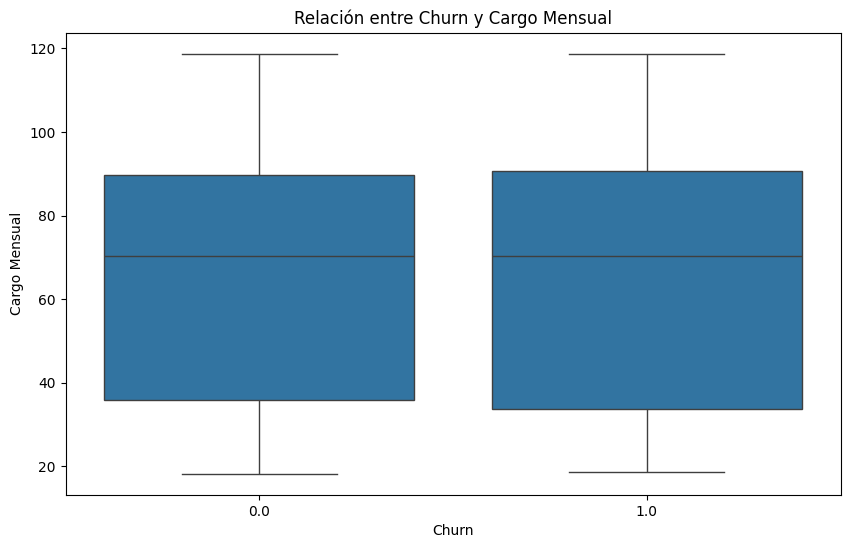

In [155]:
#Investiga cómo variables específicas se relacionan con la cancelación

#1 Boxplot - Churn vs cargo mensual

plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion', y='remainder__Charges.Monthly', data=datos_codificados)
plt.title('Relación entre Churn y Cargo Mensual')
plt.xlabel('Churn')
plt.ylabel('Cargo Mensual')
plt.show()

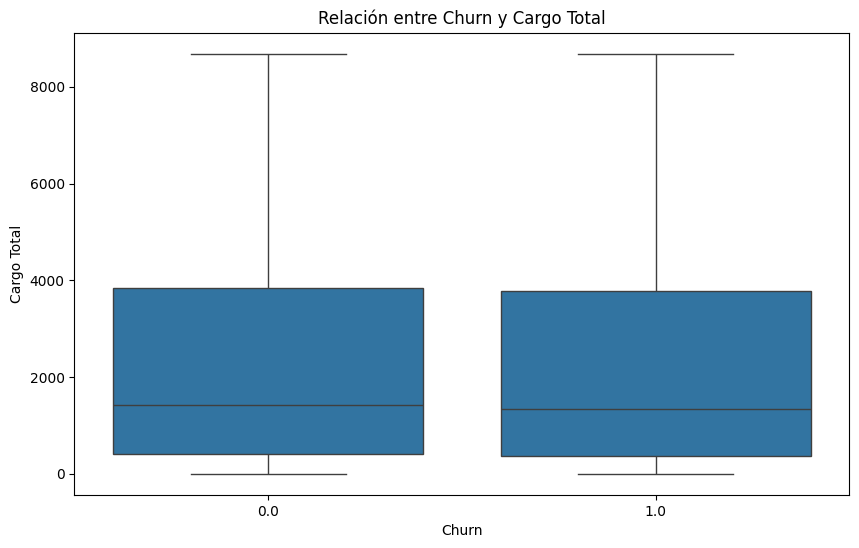

In [156]:
#2 Boxplot - cargo_total vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion', y='remainder__Charges.Total', data=datos_codificados)
plt.title('Relación entre Churn y Cargo Total')
plt.xlabel('Churn')
plt.ylabel('Cargo Total')
plt.show()

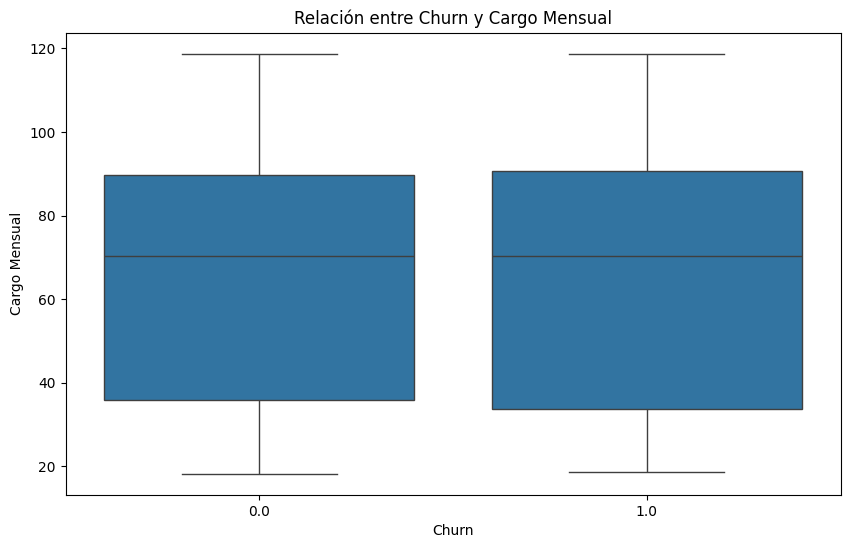

In [157]:
#3 Boxplot - Churn vs cargo_mensual
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion', y='remainder__Charges.Monthly', data=datos_codificados)
plt.title('Relación entre Churn y Cargo Mensual')
plt.xlabel('Churn')
plt.ylabel('Cargo Mensual')
plt.show()

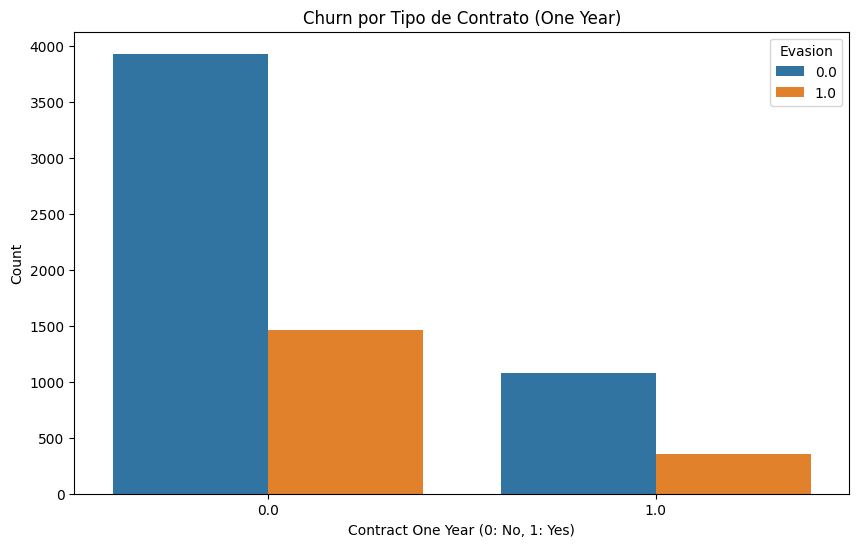

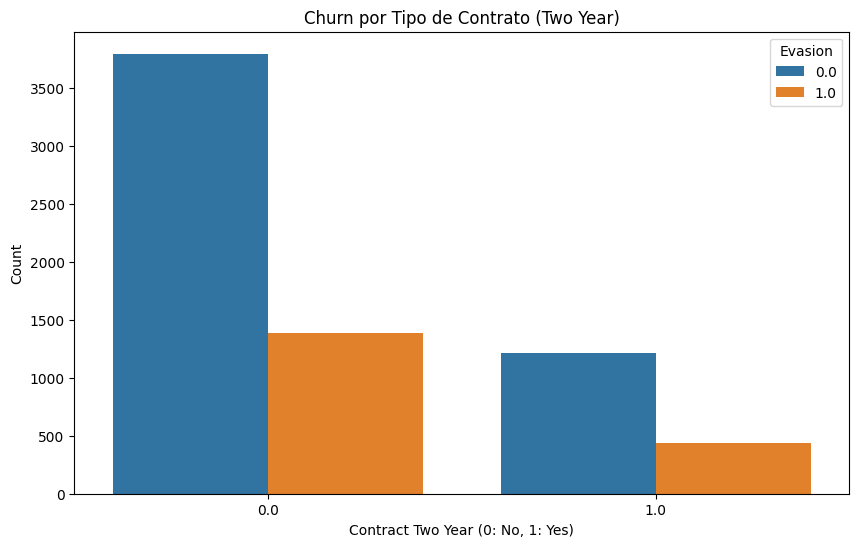

In [172]:
#4 Countplot - Churn vs tipo_contrato
plt.figure(figsize=(10, 6))
sns.countplot(x='onehotencoder__Contract_One year', hue='Evasion', data=datos_codificados)
plt.title('Churn por Tipo de Contrato (One Year)')
plt.xlabel('Contract One Year (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='onehotencoder__Contract_Two year', hue='Evasion', data=datos_codificados)
plt.title('Churn por Tipo de Contrato (Two Year)')
plt.xlabel('Contract Two Year (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

#🤖 Modelado Predictivo

##Separación de Datos

Descripción

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [187]:
# Dividir los datos (70% entrenamiento, 30% prueba) con estratificación

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [188]:
#Usar los datos balanceados usando SMOTE para dividir los datos
#en una proporción 7:3 (70% entrenamiento, 30% prueba) con estratificación

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, stratify=y_smote, random_state=42)

In [189]:
#Estandarización de los datos
X_train_estandarizado = estandarizacion.fit_transform(X_train)
X_test_estandarizado = estandarizacion.transform(X_test)

X_train_estandarizado_smote = estandarizacion.fit_transform(X_train_smote)
X_test_estandarizado_smote = estandarizacion.transform(X_test_smote)



##Creación de Modelos



Descripción

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [196]:
#Creando el modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

#Creando y entrenando el modelo
modelo_rf = RandomForestClassifier(random_state=42, max_depth=5)
modelo_rf.fit(X_train, y_train)

#Predicciones

y_predic_rf = modelo_rf.predict(X_test)

In [195]:
#Creando el modelo Random Forest con SMOTE
from sklearn.ensemble import RandomForestClassifier

#Creando y entrenando el modelo
modelo_rf_estandarizado_smote = RandomForestClassifier(random_state=42, max_depth=5)
modelo_rf_estandarizado_smote.fit(X_train_estandarizado_smote, y_train_smote)

#Predicciones

y_predic_rf_smote = modelo_rf_estandarizado_smote.predict(X_test_estandarizado_smote)

In [207]:
#Métricas: Matriz de Confusión, Accuracy(Exactitud), Recall, F1-Score, Precisión
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
print('Resultados Random Forest:')
print('Reporte de Clasificación:')
print(classification_report(y_test, y_predic_rf, zero_division=0))  # Aquí se agrega zero_division
print('\nMatriz de Confusión:')
print(confusion_matrix(y_test, y_predic_rf))

print('\nPrecisión del Modelo:')
print(precision_score(y_test, y_predic_rf, zero_division=1))

print('\nRecall del Modelo:')
print(recall_score(y_test, y_predic_rf, zero_division=1))

print('\nF1-Score del Modelo:')
print(f1_score(y_test, y_predic_rf, zero_division=1))

Resultados Random Forest:
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      1503
         1.0       0.00      0.00      0.00       546

    accuracy                           0.73      2049
   macro avg       0.37      0.50      0.42      2049
weighted avg       0.54      0.73      0.62      2049


Matriz de Confusión:
[[1503    0]
 [ 546    0]]

Precisión del Modelo:
1.0

Recall del Modelo:
0.0

F1-Score del Modelo:
0.0


In [208]:
#Métricas: Matriz de Confusión, Accuracy(Exactitud), Recall, F1-Score, Precisión
#con Datos Balanceados

print('Resultados Random Forest (Datos Balanceados):')

print('Reporte de Clasificación:')
print(classification_report(y_test_smote, y_predic_rf_smote))

print('\nMatriz de Confusión:')
print(confusion_matrix(y_test_smote, y_predic_rf_smote))

print('\nExactitud del Modelo:')
print(accuracy_score(y_test_smote, y_predic_rf_smote))

print('\nPrecisión del Modelo:')
print(precision_score(y_test_smote, y_predic_rf_smote))

print('\nRecall del Modelo:')
print(recall_score(y_test_smote, y_predic_rf_smote))

print('\nF1-Score del Modelo:')
print(f1_score(y_test_smote, y_predic_rf_smote))

Resultados Random Forest (Datos Balanceados):
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82      1503
           1       0.95      0.62      0.75      1503

    accuracy                           0.79      3006
   macro avg       0.83      0.79      0.78      3006
weighted avg       0.83      0.79      0.78      3006


Matriz de Confusión:
[[1453   50]
 [ 578  925]]

Exactitud del Modelo:
0.791084497671324

Precisión del Modelo:
0.9487179487179487

Recall del Modelo:
0.6154357950765137

F1-Score del Modelo:
0.7465698143664246


In [220]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_train_scaled, y_train)

y_predic_lr = modelo_lr.predict(X_test_scaled)

print('Resultados Regresión Logística:')

print('\nReporte de Clasificación:')
print(classification_report(y_test, y_predic_lr, zero_division=0))  # <- Aquí lo agregamos

print('\nMatriz de Confusión:')
print(confusion_matrix(y_test, y_predic_lr))

print('\nExactitud del Modelo:')
print(accuracy_score(y_test, y_predic_lr))

print('\nPrecisión del Modelo:')
print(precision_score(y_test, y_predic_lr, zero_division=0))  # <- Aquí también

print('\nRecall del Modelo:')
print(recall_score(y_test, y_predic_lr, zero_division=0))  # <- Y aquí

print('\nF1-Score del Modelo:')
print(f1_score(y_test, y_predic_lr, zero_division=0))  # <- Esto ya lo tenías


Resultados Regresión Logística:

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      1503
         1.0       0.00      0.00      0.00       546

    accuracy                           0.73      2049
   macro avg       0.37      0.50      0.42      2049
weighted avg       0.54      0.73      0.62      2049


Matriz de Confusión:
[[1503    0]
 [ 546    0]]

Exactitud del Modelo:
0.7335285505124451

Precisión del Modelo:
0.0

Recall del Modelo:
0.0

F1-Score del Modelo:
0.0


In [221]:
#Entrenamiento del modelo de Regresión Logística con datos balanceados

modelo_lr_smote = LogisticRegression(random_state=42)
modelo_lr_smote.fit(X_train_estandarizado_smote, y_train_smote)

y_predic_lr_smote = modelo_lr_smote.predict(X_test_estandarizado_smote)

print('Resultados Regresión Logística (Datos Balanceados):')

print('\nReporte de Clasificación:')
print(classification_report(y_test_smote, y_predic_lr_smote))

print('\nMatriz de Confusión:')
print(confusion_matrix(y_test_smote, y_predic_lr_smote))

print('\nExactitud del Modelo:')
print(accuracy_score(y_test_smote, y_predic_lr_smote))

print('\nPrecisión del Modelo:')
print(precision_score(y_test_smote, y_predic_lr_smote))

print('\nRecall del Modelo:')
print(recall_score(y_test_smote, y_predic_lr_smote))

print('\nF1-Score del Modelo:')
print(f1_score(y_test_smote, y_predic_lr_smote))

Resultados Regresión Logística (Datos Balanceados):

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1503
           1       0.52      0.54      0.53      1503

    accuracy                           0.52      3006
   macro avg       0.52      0.52      0.52      3006
weighted avg       0.52      0.52      0.52      3006


Matriz de Confusión:
[[744 759]
 [684 819]]

Exactitud del Modelo:
0.5199600798403193

Precisión del Modelo:
0.5190114068441065

Recall del Modelo:
0.5449101796407185

F1-Score del Modelo:
0.5316455696202531


##Evaluación de los Modelos

Descripción

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [222]:
#Importamos la libreria Numpy
import numpy as np

In [223]:
#Evaluamos la importancia y se muestra las features del modelo RandomForest

importances_modelo_rf = modelo_rf.feature_importances_

feature_importances_rf = pd.DataFrame({'Feature': X_df.columns, 'Importance': importances_modelo_rf})
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)
feature_importances_rf

,Feature,Importance
25,remainder__Charges.Total,0.288775
24,remainder__Charges.Monthly,0.255475
0,onehotencoder__gender_Male,0.041381
17,onehotencoder__Contract_One year,0.028617
2,onehotencoder__Dependents_Yes,0.027793
22,onehotencoder__PaymentMethod_Mailed check,0.027456
19,onehotencoder__PaperlessBilling_Yes,0.027453
23,remainder__SeniorCitizen,0.027372
21,onehotencoder__PaymentMethod_Electronic check,0.026930
14,onehotencoder__StreamingTV_Yes,0.026878


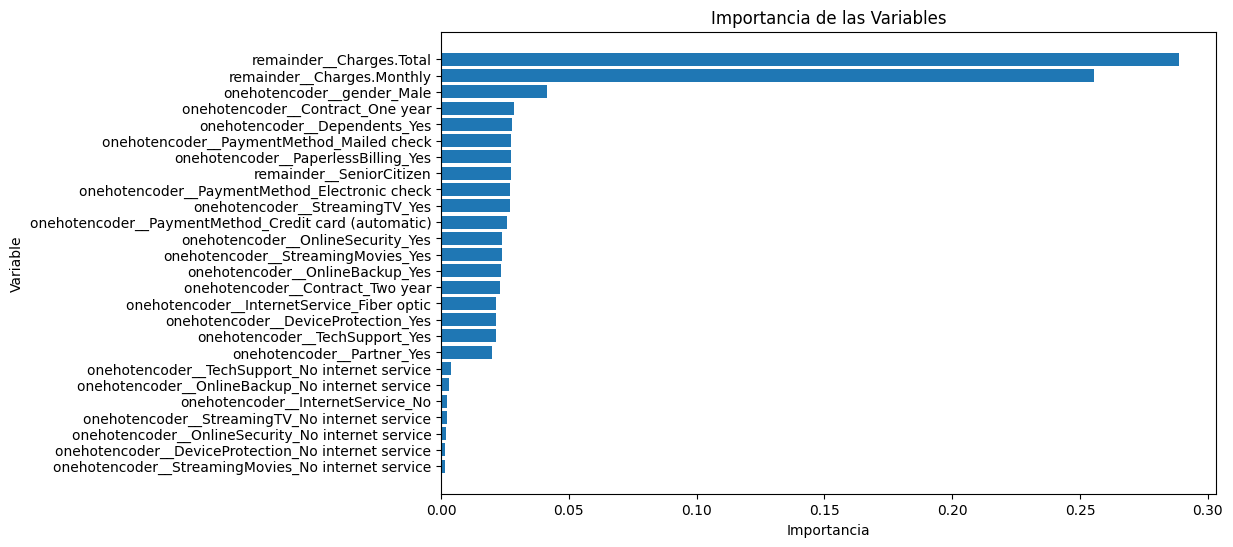

In [224]:
#Graficando los resultados
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf['Feature'], feature_importances_rf['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables')
plt.show()

In [225]:
#Evaluamos la importancia y se muestra las features del modelo RandomForest Balanceado

importances_modelo_rf_smote = modelo_rf_estandarizado_smote.feature_importances_

feature_importances_rf_smote = pd.DataFrame({'Feature': X_df.columns, 'Importance': importances_modelo_rf_smote})
feature_importances_rf_smote = feature_importances_rf_smote.sort_values(by='Importance', ascending=False)
feature_importances_rf_smote

,Feature,Importance
0,onehotencoder__gender_Male,0.160722
20,onehotencoder__PaymentMethod_Credit card (auto...,0.096327
1,onehotencoder__Partner_Yes,0.089237
12,onehotencoder__TechSupport_Yes,0.088711
21,onehotencoder__PaymentMethod_Electronic check,0.080407
2,onehotencoder__Dependents_Yes,0.079939
19,onehotencoder__PaperlessBilling_Yes,0.073517
23,remainder__SeniorCitizen,0.058600
22,onehotencoder__PaymentMethod_Mailed check,0.052017
17,onehotencoder__Contract_One year,0.047923


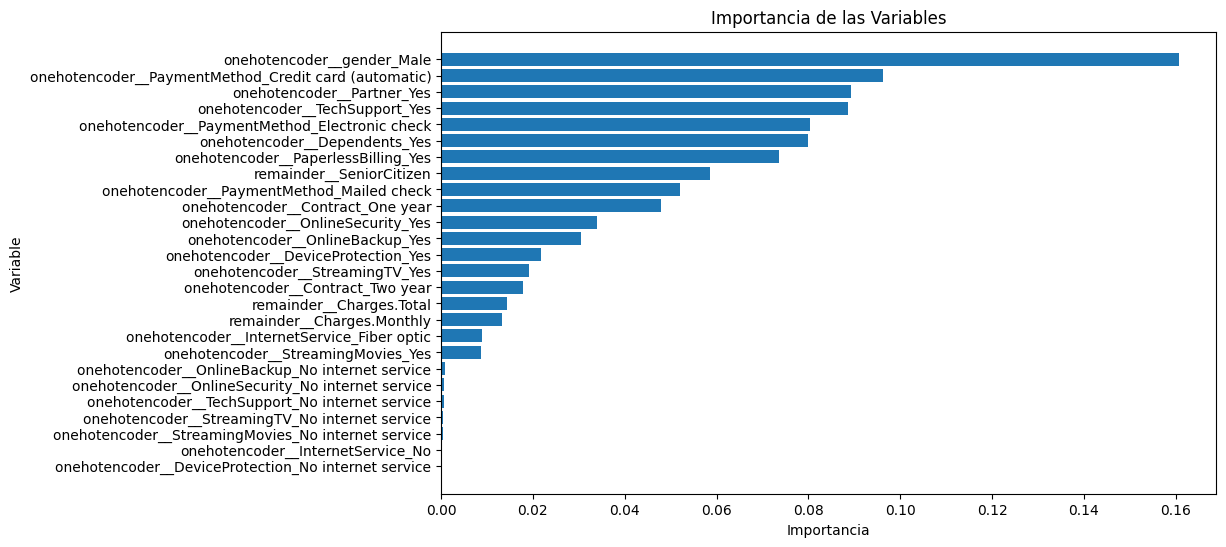

In [226]:
#Graficando los resultados
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf_smote['Feature'], feature_importances_rf_smote['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables')
plt.show()

In [227]:
#Evaluamos la importancia y se muestra las features del modelo Regresion Logistica

importances_modelo_lg = np.abs(modelo_lr.coef_[0])

feature_importances_lg = pd.DataFrame({'Feature': X_df.columns, 'Importance': importances_modelo_lg})
feature_importances_lg = feature_importances_lg.sort_values(by='Importance', ascending=False)
feature_importances_lg

,Feature,Importance
14,onehotencoder__StreamingTV_Yes,0.080844
22,onehotencoder__PaymentMethod_Mailed check,0.076189
10,onehotencoder__DeviceProtection_Yes,0.059652
18,onehotencoder__Contract_Two year,0.059255
3,onehotencoder__InternetService_Fiber optic,0.057802
17,onehotencoder__Contract_One year,0.056249
23,remainder__SeniorCitizen,0.054864
24,remainder__Charges.Monthly,0.042083
20,onehotencoder__PaymentMethod_Credit card (auto...,0.038308
16,onehotencoder__StreamingMovies_Yes,0.036022


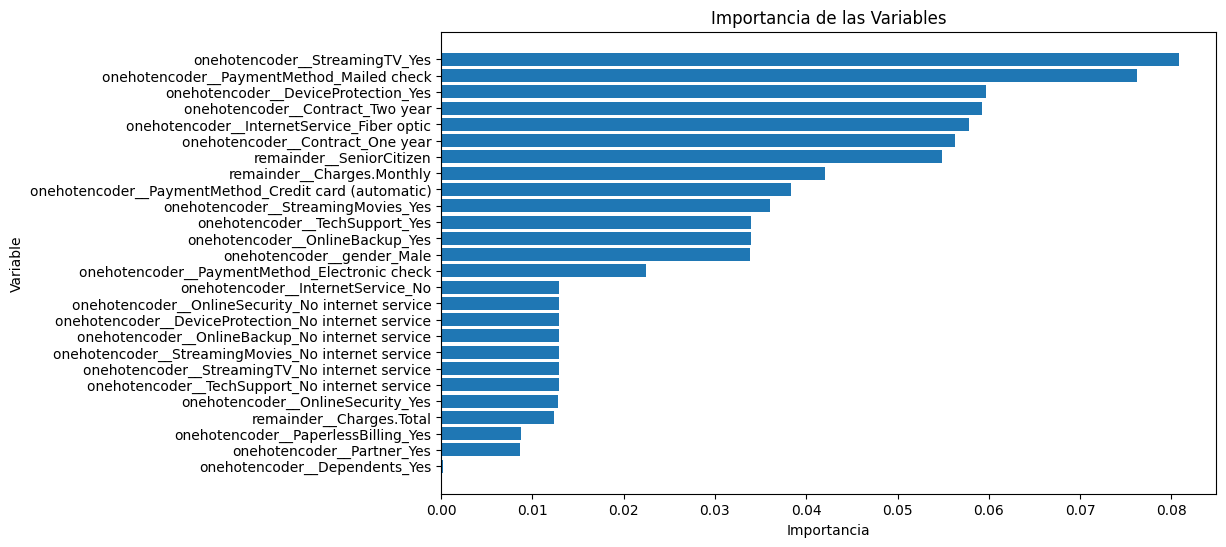

In [228]:
#Graficando los resultados
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_lg['Feature'], feature_importances_lg['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables')
plt.show()

In [229]:
#Evaluamos la importancia y se muestra las features del modelo Regresion Logistica Balanceado

importances_modelo_lg_smote = np.abs(modelo_lr_smote.coef_[0])

feature_importances_lg_smote = pd.DataFrame({'Feature': X_df.columns, 'Importance': importances_modelo_lg_smote})
feature_importances_lg_smote = feature_importances_lg_smote.sort_values(by='Importance', ascending=False)
feature_importances_lg_smote

,Feature,Importance
24,remainder__Charges.Monthly,0.163196
18,onehotencoder__Contract_Two year,0.085054
14,onehotencoder__StreamingTV_Yes,0.076906
17,onehotencoder__Contract_One year,0.063866
23,remainder__SeniorCitizen,0.061616
16,onehotencoder__StreamingMovies_Yes,0.059365
12,onehotencoder__TechSupport_Yes,0.059137
0,onehotencoder__gender_Male,0.055100
22,onehotencoder__PaymentMethod_Mailed check,0.051999
21,onehotencoder__PaymentMethod_Electronic check,0.043515


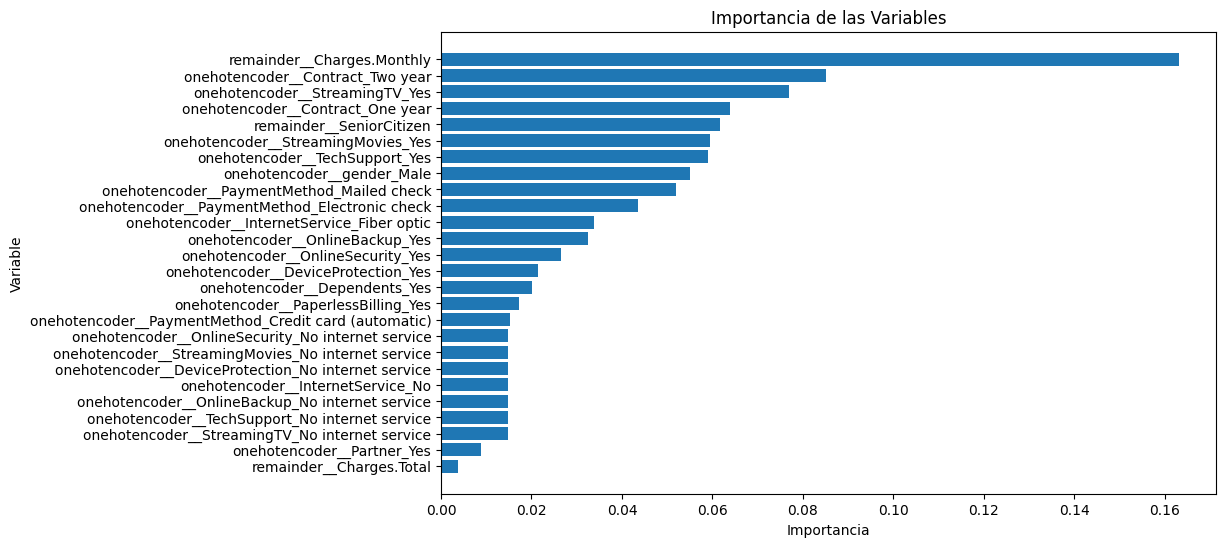

In [230]:
#Graficando los resultados
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_lg_smote['Feature'], feature_importances_lg_smote['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


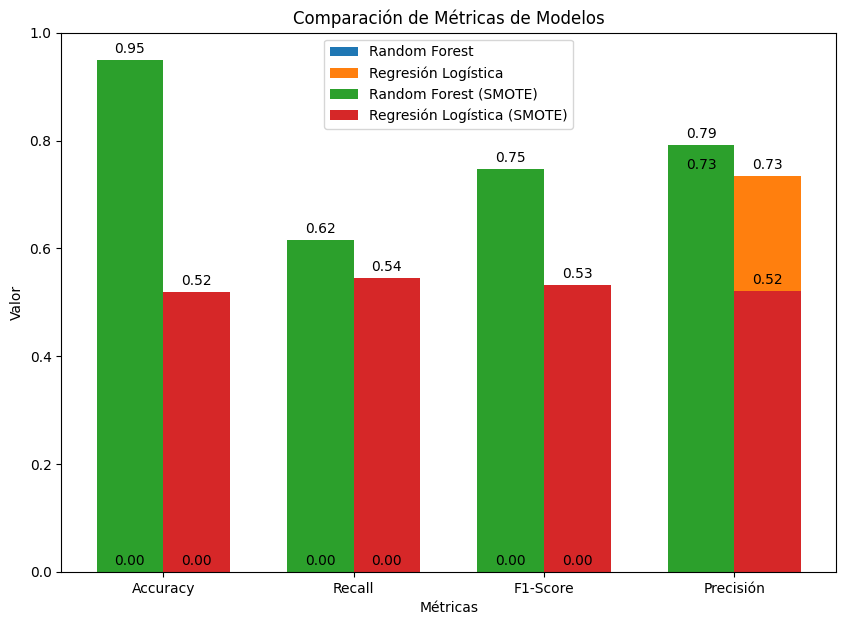

In [231]:
#Otras métricas

metricas = ['Accuracy', 'Recall', 'F1-Score', 'Precisión']
metricas_rf = [
    precision_score(y_test, y_predic_rf),
    recall_score(y_test, y_predic_rf),
    f1_score(y_test, y_predic_rf),
    accuracy_score(y_test, y_predic_rf)
]

metricas_rf_smote = [
    precision_score(y_test_smote, y_predic_rf_smote),
    recall_score(y_test_smote, y_predic_rf_smote),
    f1_score(y_test_smote, y_predic_rf_smote),
    accuracy_score(y_test_smote, y_predic_rf_smote)
]

metricas_lr = [
    precision_score(y_test, y_predic_lr),
    recall_score(y_test, y_predic_lr),
    f1_score(y_test, y_predic_lr),
    accuracy_score(y_test, y_predic_lr)
]

metricas_lr_smote = [
    precision_score(y_test_smote, y_predic_lr_smote),
    recall_score(y_test_smote, y_predic_lr_smote),
    f1_score(y_test_smote, y_predic_lr_smote),
    accuracy_score(y_test_smote, y_predic_lr_smote)
]

x = np.arange(len(metricas))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7))
rects_rf = ax.bar(x - width/2, metricas_rf, width, label='Random Forest')
rects_lr = ax.bar(x + width/2, metricas_lr, width, label='Regresión Logística')
rects_rf_smote = ax.bar(x - width/2, metricas_rf_smote, width, label='Random Forest (SMOTE)')
rects_lr_smote = ax.bar(x + width/2, metricas_lr_smote, width, label='Regresión Logística (SMOTE)')

ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Comparación de Métricas de Modelos')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()

#Mostrar los valores en cada barra
for rects in [rects_rf, rects_lr, rects_rf_smote, rects_lr_smote]:
    for rect in rects:
      height = rect.get_height()
      ax.annotate(f'{height:.2f}',
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # Desplazamiento vertical
                  textcoords="offset points",
                  ha='center', va='bottom')

plt.ylim(0, 1)  # Escala de 0 a 1
plt.show()

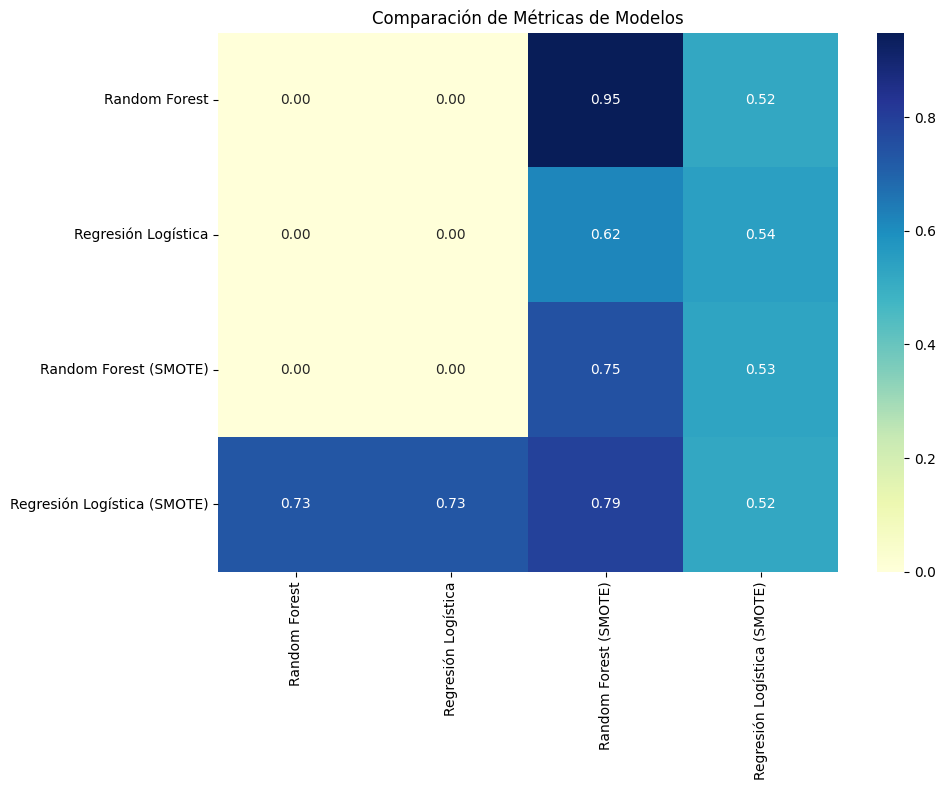

In [233]:
#HeadMap comparativo

data_modelos = {
    'Random Forest': metricas_rf,
    'Regresión Logística': metricas_lr,
    'Random Forest (SMOTE)': metricas_rf_smote,
    'Regresión Logística (SMOTE)': metricas_lr_smote
    }
nombres_modelos = ['Random Forest', 'Regresión Logística', 'Random Forest (SMOTE)', 'Regresión Logística (SMOTE)']

df_metricas = pd.DataFrame(data_modelos, index=nombres_modelos)

plt.figure(figsize=(10, 7))
sns.heatmap(df_metricas, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Comparación de Métricas de Modelos')
plt.show()

#📋 Interpretación y Conclusiones

##Análisis de la Importancia de las Variables



Descripción

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

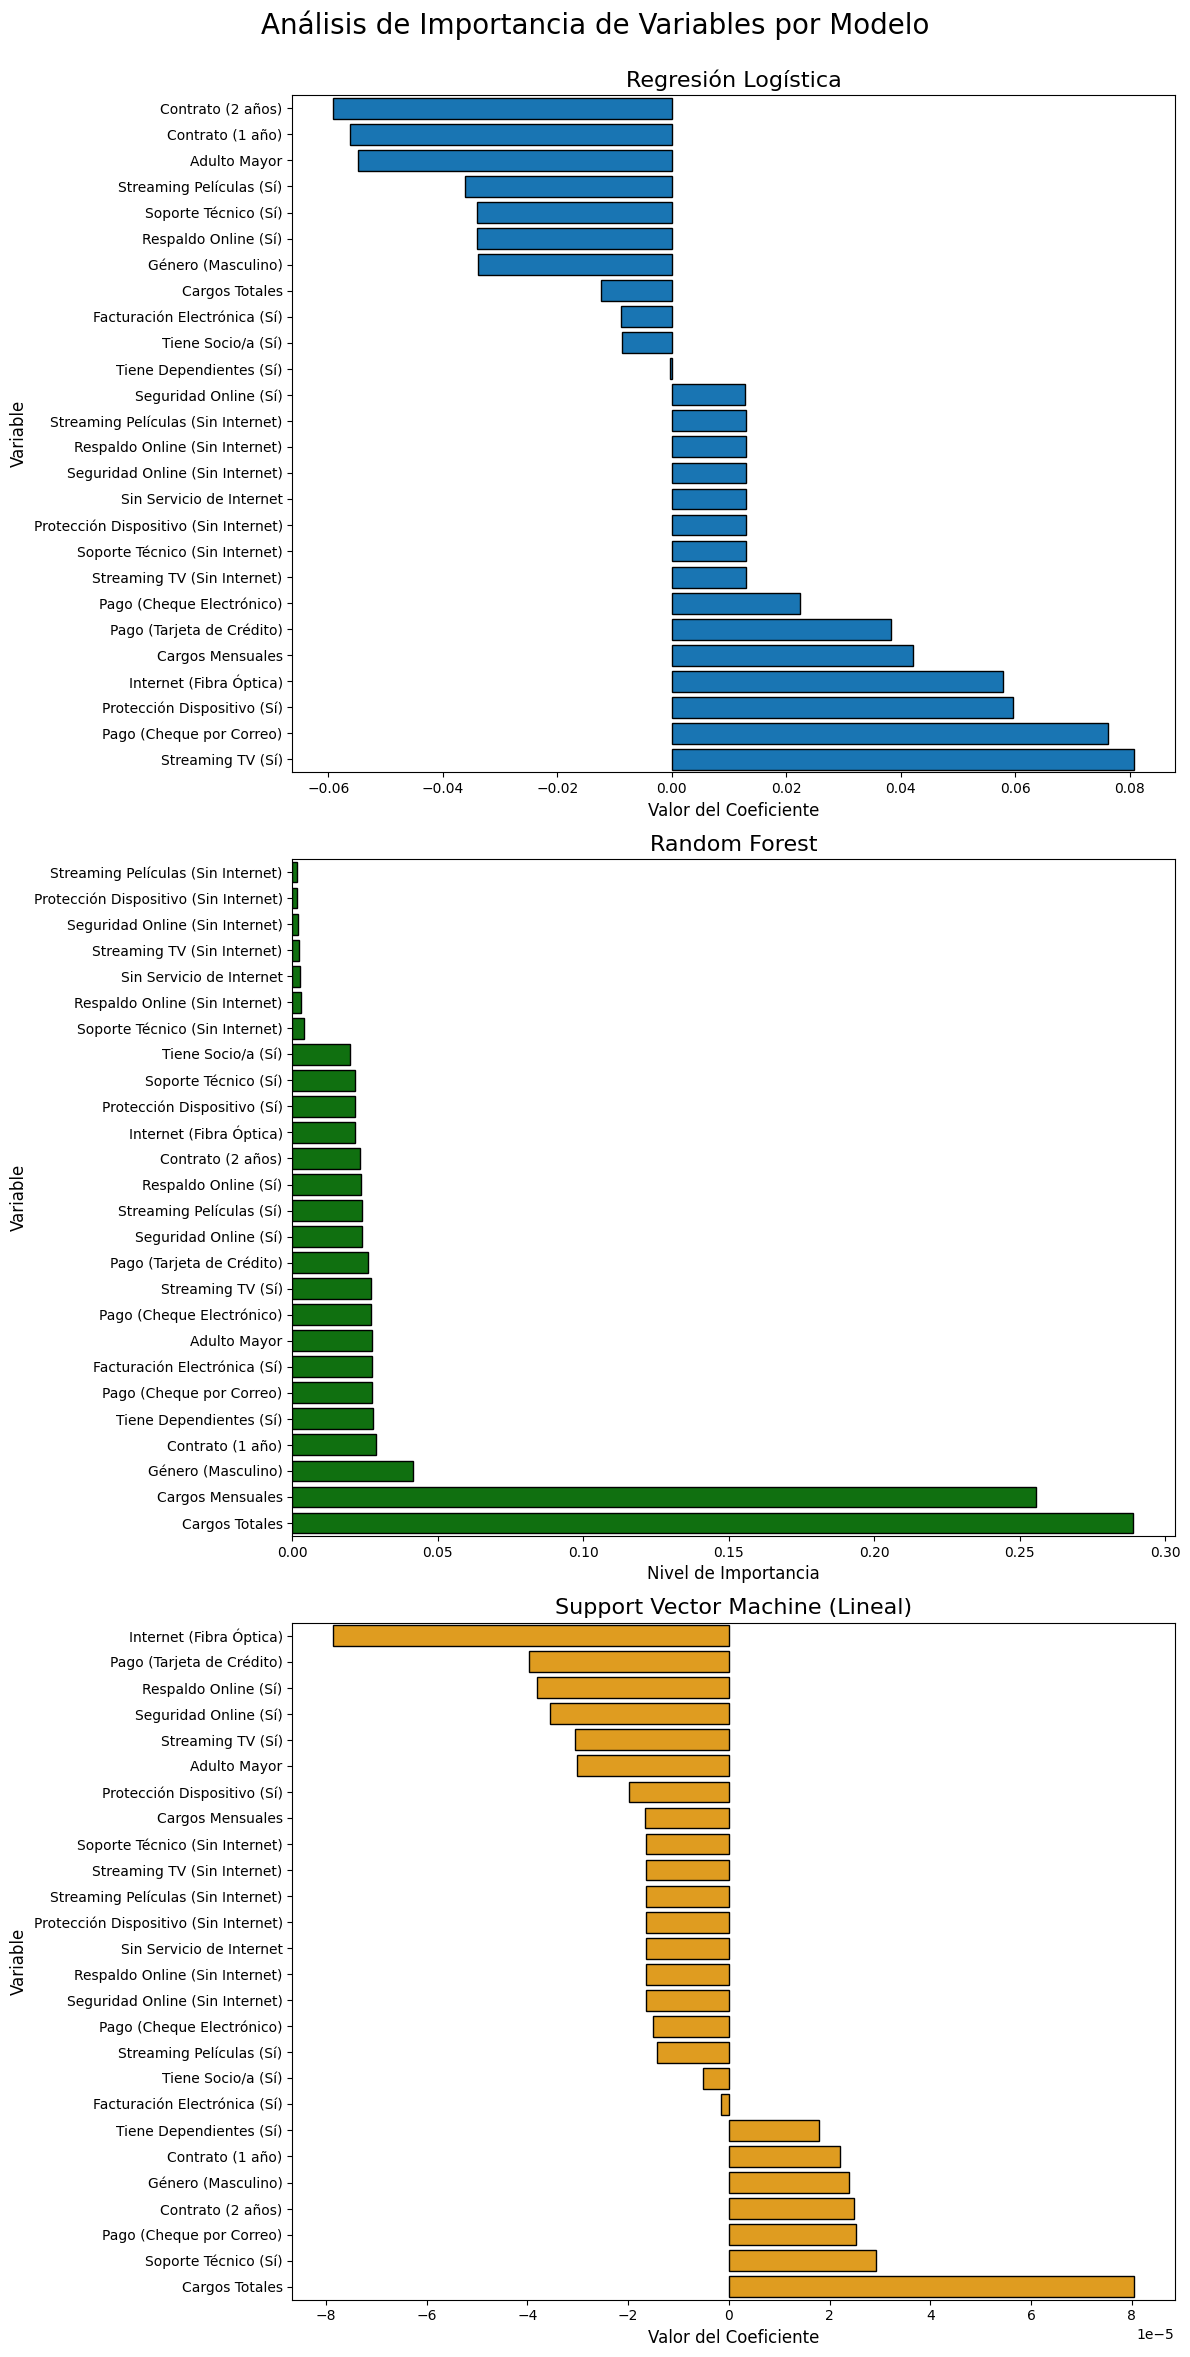

In [242]:
# --- Diccionario de Traducciones para los Gráficos ---
#
# Se crea un diccionario para traducir los nombres técnicos de las columnas a un formato
# más legible y en español, que se usará en las etiquetas de los gráficos.
traducciones = {
    'onehotencoder__Contract_Two year': 'Contrato (2 años)', 'tenure': 'Antigüedad (meses)',
    'onehotencoder__InternetService_No': 'Sin Servicio de Internet', 'onehotencoder__PaymentMethod_Electronic check': 'Pago (Cheque Electrónico)',
    'onehotencoder__PaperlessBilling_Yes': 'Facturación Electrónica (Sí)', 'remainder__Charges.Total': 'Cargos Totales',
    'remainder__Charges.Monthly': 'Cargos Mensuales', 'Costo_Diario': 'Costo Diario',
    'onehotencoder__InternetService_Fiber optic': 'Internet (Fibra Óptica)', 'onehotencoder__PaymentMethod_Mailed check': 'Pago (Cheque por Correo)',
    'onehotencoder__PaymentMethod_Credit card (automatic)': 'Pago (Tarjeta de Crédito)', 'onehotencoder__Contract_One year': 'Contrato (1 año)',
    'remainder__SeniorCitizen': 'Adulto Mayor', 'onehotencoder__Partner_Yes': 'Tiene Socio/a (Sí)',
    'onehotencoder__Dependents_Yes': 'Tiene Dependientes (Sí)', 'MultipleLines_Yes': 'Múltiples Líneas (Sí)',
    'onehotencoder__StreamingMovies_Yes': 'Streaming Películas (Sí)', 'onehotencoder__StreamingTV_Yes': 'Streaming TV (Sí)',
    'onehotencoder__DeviceProtection_Yes': 'Protección Dispositivo (Sí)', 'onehotencoder__OnlineBackup_Yes': 'Respaldo Online (Sí)',
    'onehotencoder__TechSupport_Yes': 'Soporte Técnico (Sí)', 'onehotencoder__OnlineSecurity_Yes': 'Seguridad Online (Sí)',
    'onehotencoder__gender_Male': 'Género (Masculino)', 'PhoneService_Yes': 'Servicio Telefónico (Sí)',
    'MultipleLines_No phone service': 'Múltiples Líneas (Sin Teléfono)', 'onehotencoder__TechSupport_No internet service': 'Soporte Técnico (Sin Internet)',
    'onehotencoder__OnlineSecurity_No internet service': 'Seguridad Online (Sin Internet)', 'onehotencoder__DeviceProtection_No internet service': 'Protección Dispositivo (Sin Internet)',
    'onehotencoder__OnlineBackup_No internet service': 'Respaldo Online (Sin Internet)', 'onehotencoder__StreamingTV_No internet service': 'Streaming TV (Sin Internet)',
    'onehotencoder__StreamingMovies_No internet service': 'Streaming Películas (Sin Internet)'
}

# --- Creación de una Figura con Múltiples Subgráficos Verticales ---
#
# Se crea una única figura que contendrá 4 subgráficos (axes) organizados en 4 filas y 1 columna.
# El tamaño (figsize) se ajusta para que cada gráfico tenga un buen espacio vertical.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 24))
fig.suptitle('Análisis de Importancia de Variables por Modelo', fontsize=20)

from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

# --- Gráfico 1: Regresión Logística ---
#
# Se extraen los coeficientes del modelo de Regresión Logística ya entrenado.
# Se asocian con sus nombres de variable y se ordenan para la visualización.
coeficientes = pd.Series(modelo_lr.coef_[0], index=X_df.columns).sort_values()
# Se utiliza el diccionario de traducciones para cambiar los nombres de las variables al español.
coeficientes_traducidos = coeficientes.rename(index=traducciones)
# Se genera el gráfico de barras en el primer subgráfico (axes[0]).
sns.barplot(x=coeficientes_traducidos.values, y=coeficientes_traducidos.index, color='#007ACC', edgecolor='black', ax=axes[0])
# Se personalizan los títulos y etiquetas del primer subgráfico.
axes[0].set_title('Regresión Logística', fontsize=16)
axes[0].set_xlabel('Valor del Coeficiente', fontsize=12)
axes[0].set_ylabel('Variable', fontsize=12)


# --- Gráfico 2: Random Forest ---
#
# Se extrae la importancia de cada variable (feature importance) del modelo Random Forest.
# Este valor indica cuánto contribuye cada variable a la predicción del modelo.
importancia_rf = pd.Series(modelo_rf.feature_importances_, index=X_df.columns).sort_values()
importancia_rf_traducida = importancia_rf.rename(index=traducciones) # Se traducen los nombres.
# Se genera el gráfico de barras en el segundo subgráfico (axes[1]).
sns.barplot(x=importancia_rf_traducida.values, y=importancia_rf_traducida.index, color='green', edgecolor='black', ax=axes[1])
axes[1].set_title('Random Forest', fontsize=16)
axes[1].set_xlabel('Nivel de Importancia', fontsize=12)
axes[1].set_ylabel('Variable', fontsize=12)


# --- Gráfico 3: SVM (con Kernel Lineal) ---
#
# Para poder interpretar el SVM, se entrena un nuevo modelo con un kernel lineal,
# ya que este tipo de kernel sí expone coeficientes directos.
svm_lineal = SVC(kernel='linear', random_state=42)
svm_lineal.fit(X_train_scaled, y_train)
# Se extraen y ordenan los coeficientes del SVM lineal.
coeficientes_svm = pd.Series(svm_lineal.coef_[0], index=X_df.columns).sort_values()
coeficientes_svm_traducidos = coeficientes_svm.rename(index=traducciones) # Se traducen los nombres.
# Se genera el gráfico de barras en el tercer subgráfico (axes[2]).
sns.barplot(x=coeficientes_svm_traducidos.values, y=coeficientes_svm_traducidos.index, color='orange', edgecolor='black', ax=axes[2])
axes[2].set_title('Support Vector Machine (Lineal)', fontsize=16)
axes[2].set_xlabel('Valor del Coeficiente', fontsize=12)
axes[2].set_ylabel('Variable', fontsize=12)


# --- Ajuste Final y Visualización ---
#
# Se ajusta el layout para que no se superpongan los elementos y se muestra la figura
# que contiene los cuatro gráficos de importancia de variables.
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

####**Interpretación de los Gráficos Resultantes**

Al ejecutar este código, obtendrás cuatro gráficos. Esto es lo que debes observar:

#####**Regresión Logística y SVM Lineal:**

Estos modelos son lineales, lo que permite una interpretación directa de los coeficientes de cada variable.

-  Barras a la derecha (positivas): Son las variables que más aumentan la probabilidad de cancelación. Los resultados del análisis muestran que características como tener Fibra Óptica o pagar con Cheque Electrónico son fuertes impulsores de la evasión.

-  Barras a la izquierda (negativas): Son las variables que más disminuyen la probabilidad de cancelación (es decir, que fomentan la retención). Como era de esperar, la antigüedad (tenure) y los contratos a largo plazo (1 o 2 años) son los factores de retención más importantes.

#####**Explicación del Eje X (Valor del Coeficiente)**

El eje X en estos dos gráficos representa el valor del coeficiente que el modelo le asigna a cada variable. Este valor nos dice dos cosas:

1. *La Dirección del Impacto (el signo +/-):*

-  Un coeficiente positivo significa que la variable está directamente relacionada con la cancelación. A medida que el valor de esa variable aumenta, la probabilidad de que el cliente cancele (Evasion = 1) también aumenta.

-  Un coeficiente negativo significa que la variable está inversamente relacionada con la cancelación. A medida que el valor de esa variable aumenta (por ejemplo, más meses de antigüedad), la probabilidad de que el cliente cancele disminuye.

2. *La Fuerza del Impacto (la magnitud):*

-  El tamaño de la barra (o el valor absoluto del coeficiente) indica qué tan fuerte es ese impacto. Una barra larga (ya sea positiva o negativa) representa una variable que tiene una gran influencia en la predicción del modelo.

#####**Random Forest y Red Neuronal (Permutation Importance):**

Estos modelos son más complejos y no tienen coeficientes directos, por lo que su importancia se mide de otra forma.

-  En estos gráficos, todas las barras serán positivas. La longitud de la barra indica la importancia general de la variable para el modelo, sin importar si el efecto es positivo o negativo.

-  Los resultados muestran que las variables más largas coinciden en gran medida con los extremos de los gráficos anteriores. Variables como la antigüedad, los cargos mensuales y el tipo de contrato son consistentemente las más destacadas, confirmando su alta relevancia.

#####**Explicación del Eje X (Nivel de Importancia)**

El eje X en estos dos gráficos representa el poder predictivo general de cada variable. A diferencia de los coeficientes, estos valores siempre son positivos y se interpretan así:

1. *Random Forest (Nivel de Importancia):*

-  El eje X muestra cuánto contribuye cada variable a la "pureza" de las decisiones dentro de los árboles que componen el bosque. Una barra más larga significa que el modelo depende más de esa variable para clasificar correctamente a los clientes entre los que cancelan y los que no.

2. *Red Neuronal (Caída en el Rendimiento):*

-  En este caso, el eje X muestra cuánto empeora el rendimiento del modelo si se le quita la información de esa variable (desordenándola aleatoriamente). Una barra larga significa que la variable es muy importante, porque sin ella, el modelo pierde mucha de su capacidad predictiva.

-  En ambos casos, una barra más larga significa que la variable es más fundamental para las predicciones del modelo.

##Conclusión



Descripción

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.



## Informe Detallado de Factores de Cancelación

Basado en el análisis de los datos de **TelecomX_LATAM_2**, hemos identificado varias variables clave que influyen significativamente en la tasa de cancelación de clientes (churn)

### 1. Variables Categóricas

-   **Tipo de Contrato (Contract)**: Esta es una de las variables más influyentes. Los clientes con **contratos "Mes a Mes"** muestran una tasa de evasión considerablemente más alta en comparación con aquellos con contratos de "Un Año" o "Dos Años". Esto sugiere que los clientes con compromisos a corto plazo son menos leales y más propensos a cancelar el servicio.
-   **Método de Pago (PaymentMethod)**: El método de pago también revela patrones importantes. Los clientes que utilizan **"Cheque Electrónico"** tienen la tasa de cancelación más alta. Esto podría indicar problemas en el proceso de pago, falta de automatización o que este segmento de clientes es inherentemente menos estable.
-   **Género (gender)**: El análisis por género no mostró una diferencia significativa en la tasa de evasión, lo que indica que no es un factor determinante en la cancelación del servicio.

### 2. Variables Numéricas

-   **Antigüedad (tenure)**: Existe una fuerte correlación negativa entre la antigüedad del cliente y la evasión. Los **clientes nuevos (con baja antigüedad)** son mucho más propensos a cancelar. La tasa de churn disminuye drásticamente a medida que el cliente permanece más tiempo con la empresa, estabilizándose después de los primeros meses.
-   **Cargos Mensuales y Diarios (Charges.Monthly / Costo_Diario)**: Se observa una correlación positiva entre los cargos mensuales/diarios y la evasión. Los clientes que pagan **tarifas mensuales más altas** tienden a cancelar más. Esto es especialmente notorio en clientes con servicios de mayor costo, como la fibra óptica.
-   **Cantidad de Servicios Contratados**: La relación no es lineal, pero se identificó que los clientes con **muy pocos servicios (1-2)** o con una **gran cantidad de servicios (aproximadamente 7)** tienen tasas de evasión más altas. Esto podría deberse a que los clientes con pocos servicios no perciben suficiente valor, mientras que aquellos con muchos servicios pueden sentirse abrumados por el costo total.

---

## Principales Factores de Cancelación y Estrategias de Retención

A partir del informe anterior, los principales factores que impulsan la cancelación de clientes son el **tipo de contrato a corto plazo**, la **baja antigüedad** y los **altos cargos mensuales**.

A continuación, se proponen estrategias de retención específicas para abordar cada uno de estos factores.

### Estrategias de Retención Propuestas

#### **1. Optimizar la Estrategia de Contratos**

* **Factor Principal**: La alta tasa de evasión en clientes con contratos **"Mes a Mes"**.
* **Estrategias Propuestas**:
    * **Incentivos para Contratos a Largo Plazo**: Lanzar campañas de marketing dirigidas a los clientes de "Mes a Mes" ofreciendo descuentos atractivos, servicios adicionales gratuitos o beneficios de lealtad si migran a contratos de uno o dos años.
    * **Programas de Lealtad**: Implementar un programa de recompensas que beneficie a los clientes por su permanencia, especialmente después de superar los hitos críticos de los primeros meses.

#### **2. Mejorar la Experiencia del Cliente Nuevo**

* **Factor Principal**: La alta propensión a la cancelación de **clientes nuevos (baja antigüedad)**.
* **Estrategias Propuestas**:
    * **Onboarding Proactivo**: Crear un programa de onboarding robusto para los primeros 90 días, que incluya seguimiento personalizado, tutoriales sobre los servicios contratados y una oferta de bienvenida especial para asegurar una experiencia inicial positiva.
    * **Soporte Técnico Prioritario**: Ofrecer un canal de soporte técnico prioritario para clientes nuevos para resolver rápidamente cualquier problema técnico que pueda causar frustración y cancelación temprana.

#### **3. Revisar la Estructura de Precios y Pagos**

* **Factor Principal**: La evasión en clientes con **cargos mensuales elevados** y aquellos que pagan con **cheque electrónico**.
* **Estrategias Propuestas**:
    * **Paquetes Personalizados**: Utilizar el análisis de datos para ofrecer paquetes de servicios personalizados y flexibles que se ajusten mejor al presupuesto y a las necesidades del cliente, evitando cargos mensuales excesivos.
    * **Fomentar Pagos Automáticos**: Incentivar el uso de métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) mediante pequeños descuentos o beneficios. Esto no solo reduce la probabilidad de problemas de pago, sino que también aumenta la "adherencia" del cliente al servicio.
    * **Análisis de Valor**: Para los clientes con muchos servicios, comunicar proactivamente el valor que están recibiendo y ofrecer revisiones de cuenta para asegurar que están en el plan más rentable